In [117]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import dates
import seaborn as sb
import numpy as np
from pandas import DataFrame

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
# ACF, PACF 테스트
from statsmodels.tsa.stattools import acf, pacf
# ACF, PACF 시각화 기능
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [118]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [119]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (144, 2)
열 개수: 2
행 개수: 144

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [120]:
df = origin.set_index('Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [121]:
p = 2
d = 2
q = 2

results = []

for x in range(0, p+1):
    for y in range(0, d+1):
        for z in range(0, q+1):
            try:
                #model = ARIMA(df['Passengers'], order=(x, y, z))
                #6개월 단위 계절성 추가
                model = ARIMA(df['Passengers'], order=(x,y,z), seasonal_order=(x,y,z,6))
                fit = model.fit()

                results.append({
                    'p': x,
                    'd': y,
                    'q': z,
                    'AIC' : fit.aic,
                    'BIC' : fit.bic
                })
            except Exception as e:
                # 수렴 실패, 모형 오류는 건너뜀
                continue
df_results = DataFrame(results)

# 방법1 - 합산 점수 고려
# df_results['AIC_rank'] = df_results['AIC'].rank()
# df_results['BIC_rank'] = df_results['BIC'].rank()

# # 점수가 낮을 수록 좋음
#df_results['rank_sum'] = df_results['AIC_rank'] + df_results['BIC_rank']

#best_model = df_results.sort_values('rank_sum').iloc[0]
#best_model

best_model = df_results.sort_values(['BIC','AIC']).iloc[0]
best_model

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python

p         1.000000
d         2.000000
q         1.000000
AIC    1072.901835
BIC    1087.239507
Name: 16, dtype: float64

도출된 값으로 최종모형 만들기

In [122]:
best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q'])
)

s_best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q']),
    6
)

final_model = ARIMA(df['Passengers'], order=best_order, seasonal_order=s_best_order)
final_fit = final_model.fit()
print(final_fit.summary())

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                    SARIMAX Results                                    
Dep. Variable:                      Passengers   No. Observations:                  144
Model:             ARIMA(1, 2, 1)x(1, 2, 1, 6)   Log Likelihood                -531.451
Date:                            목, 18 12 2025   AIC                           1072.902
Time:                                 18:17:16   BIC                           1087.240
Sample:                             01-01-1949   HQIC                          1078.728
                                  - 12-01-1960                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2969      0.080     -3.709      0.000      -0.454      -0.140
ma.L1         -0.9996      5.635     -0.177      0.859     

분석 결과 활용

In [125]:
df2 = df.copy()
df2['pred'] = final_fit.fittedvalues
df2.head()

,Passengers,pred
Month,,
1949-01-01,112,0.000000
1949-02-01,118,195.476770
1949-03-01,132,125.032558
1949-04-01,129,145.660237
1949-05-01,121,126.107570


이후 1년간의 추가적인 예측값을 생성
- 월단위 데이터이므로 12개의 추가 데이터 생성

In [128]:
fc = final_fit.forecast(12)
fc

1961-01-01    449.720615
1961-02-01    420.457874
1961-03-01    442.371942
1961-04-01    482.683414
1961-05-01    489.791204
1961-06-01    555.053657
1961-07-01    644.221292
1961-08-01    624.863574
1961-09-01    524.500469
1961-10-01    478.565048
1961-11-01    406.128461
1961-12-01    451.019092
Freq: MS, Name: predicted_mean, dtype: float64

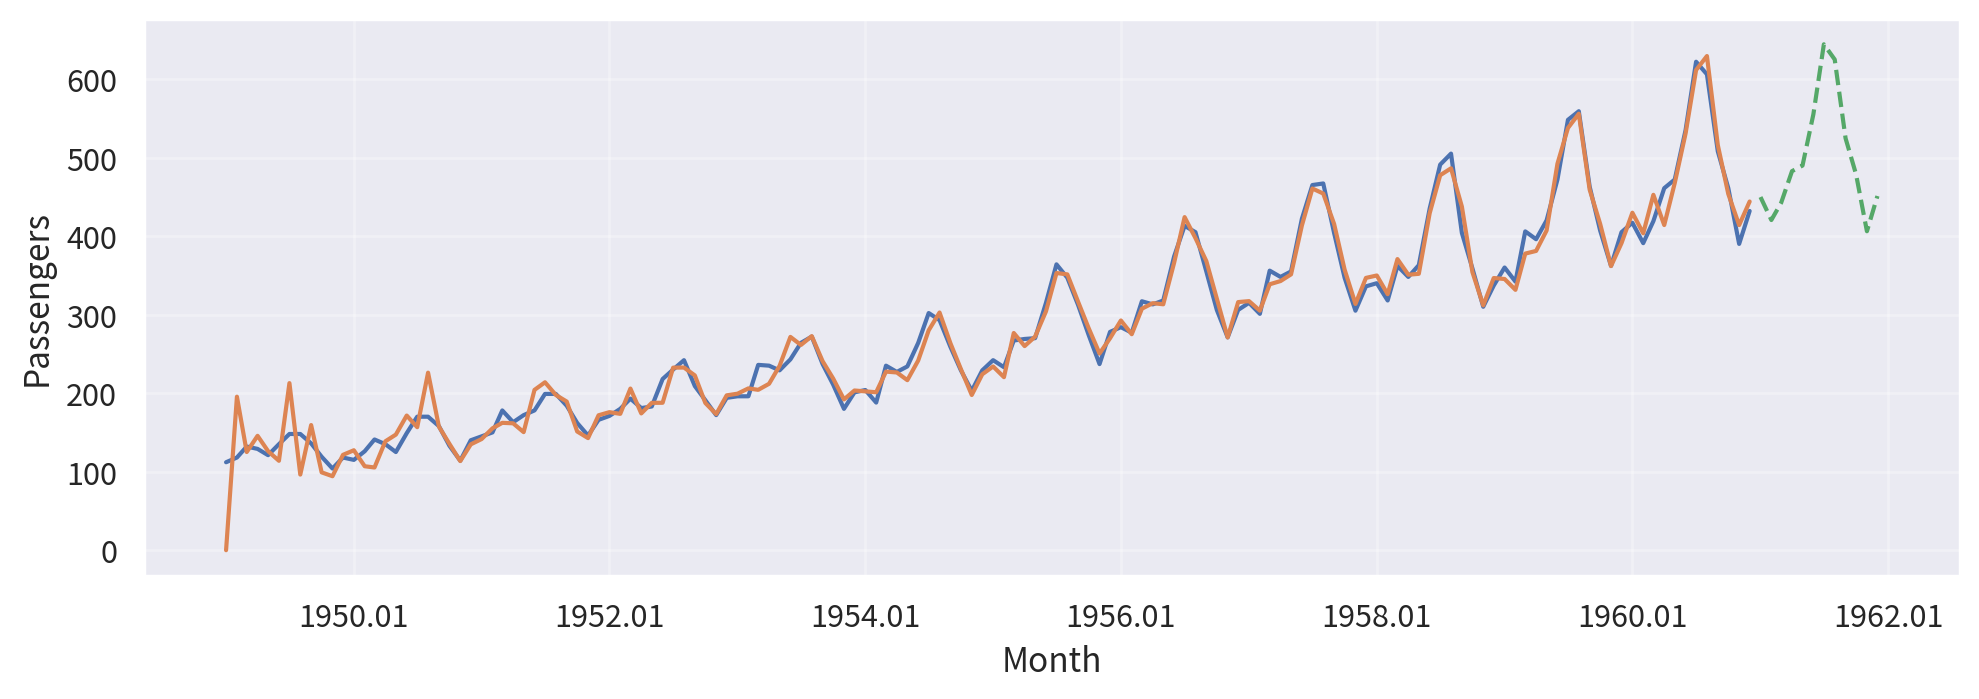

In [129]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

#관측치
sb.lineplot(data=df2, x=df2.index, y='Passengers')
#예측치
sb.lineplot(data=df2, x=df2.index, y='pred')
#이후 예상
sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

ax.grid(True, alpha=0.3)

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

분석 결과 해석
- 시계열 분석 결과 보고에서는 모형 구조 -> 적합도 -> 계수 해석 -> 잔차 진단의 흐름이 가장 표준적

결과 보고 함수

In [63]:
def arima_report(fit, data, threshold = 0.05):
    """
    SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
    모형 적합도 표(cdf),
    계수 요약 표(rdf),
    모형 요약 문장(result_report),
    모형 판정 문장(model_report),
    계수별 해석 문장(variable_reports)를 반환한다.
    """

    #--------------------
    # 1. 모형 적합도 요약
    #--------------------
    cdf = DataFrame({
        'Log Likelihood' : [fit.llf],
        'AIC' : [fit.aic],
        'BIC' : [fit.bic],
        'HQIC' : [fit.hqic],
        '관측치 수':[fit.nobs]
    })

    #--------------------
    # 2. 계수 테이블 구성
    #--------------------
    params = fit.params
    bse = fit.bse
    zvals = params/bse
    pvals = fit.pvalues
    conf = fit.conf_int()

    rows = []
    for name in params.index:
        p = pvals[name]
        stars = (
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        rows.append({
            "변수" : name,
            "계수" : params[name],
            "표준오차" : bse[name],
            "z" : f"{zvals[name]:.3f}{stars}",
            "p-value": p,
            "CI_lower": conf.loc[name,0],
            "CI_upper": conf.loc[name,1]
        })
    rdf = DataFrame(rows)

    #--------------------
    # 3. 모형 요약 문장
    #--------------------

    result_report = (
        f"Log Likelihood = {fit.llf:.3f}, "
        f"AIC = {fit.aic:.3f}, "
        f"BIC = {fit.bic:.3f}."
    )

    #--------------------
    # 4. 모형 판정 문장
    #--------------------
    lb = fit.test_serial_correlation(method='ljungbox')
    lb_pvalue = lb[0][1][-1]

    model_report = (
        f"ARIMA{fit.model.order}x{fit.model.seasonal_order}모형을 적합한 결과, "
        f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
    )

    if lb_pvalue >= threshold:
        model_report +=(
            "잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다."
            "(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)"
        )
    else:
        model_report += (
            "잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, "
            "모형이 충분히 설명하지 못했을 가능성이 있다."
            "(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)"
        )

    #--------------------
    # 5. 계수별 해석 문장
    #-------------------
    variable_reports = []

    for _, row in rdf.iterrows():
        variable_reports.append(
            f"{row['변수']} 계수는 {row['계수']:.3f}로 "
            f"통계적으로{'유의하다' if row['p-value'] < threshold else '유의하지 않다'} "
            f"(p {'<' if row['p-value'] < threshold else '>'} {threshold})."
        )

    return cdf, rdf, result_report, model_report, variable_reports

cdf, rdf, r, m, v = arima_report(final_fit, df2)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)


,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-531.450917,1072.901835,1087.239507,1078.72771,144


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,ar.L1,-0.296878,0.080038,-3.709***,0.000208,-0.453749,-0.140007
1,ma.L1,-0.999587,5.635402,-0.177,0.859213,-12.044772,10.045598
2,ar.S.L6,-0.984122,0.011507,-85.526***,0.000000,-1.006675,-0.961569
3,ma.S.L6,-0.996244,1.991822,-0.500,0.616957,-4.900144,2.907656
4,sigma2,134.605180,795.200757,0.169,0.865583,-1423.959664,1693.170023


'Log Likelihood = -531.451, AIC = 1072.902, BIC = 1087.240.'

'ARIMA(1, 2, 1)x(1, 2, 1, 6)모형을 적합한 결과, AIC 1072.902, BIC 1087.240로 나타났으며 잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다.(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)'

['ar.L1 계수는 -0.297로 통계적으로유의하다 (p < 0.05).',
 'ma.L1 계수는 -1.000로 통계적으로유의하지 않다 (p > 0.05).',
 'ar.S.L6 계수는 -0.984로 통계적으로유의하다 (p < 0.05).',
 'ma.S.L6 계수는 -0.996로 통계적으로유의하지 않다 (p > 0.05).',
 'sigma2 계수는 134.605로 통계적으로유의하지 않다 (p > 0.05).']

연습문제 1.
---
- temperatures_seoul 데이터는 1937년 07월 01일부터 2023년 08월 06일까지 서울의 평균 기온을 조사한 자료의 일부이다.
- 이 데이터를 활용하여 조사기간동안 서울의 평균 기온이 어떻게 변화하고 있는지 분석하고 앞으로 1년간의 평균 기온을 시각화 하시오.
- 시각화 기간은 2023년 8월 6일을 기준으로 전후 1년간으로 한다.

In [130]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import dates
import seaborn as sb
import numpy as np
from pandas import DataFrame
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

In [131]:
origin = load_data('temperatures_seoul')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/temperatures_seoul.xlsx
[desc] 1973년 7월 1일부터 2023년 8월 6일까지 서울의 일평균 기온 데이터 (출처: 기상청)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (18299, 2)
열 개수: 2
행 개수: 18299

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18299 entries, 0 to 18298
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       18299 non-null  datetime64[ns]
 1   평균기온(℃)  18299 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 286.1 KB
None


,날짜,평균기온(℃)
0,1973-07-01,22.7
1,1973-07-02,23.8
2,1973-07-03,27.2
3,1973-07-04,25.2
4,1973-07-05,26.9


In [132]:
df = origin.set_index('날짜')
df.head()

,평균기온(℃)
날짜,
1973-07-01,22.7
1973-07-02,23.8
1973-07-03,27.2
1973-07-04,25.2
1973-07-05,26.9


,차수,ADF Statistic,p-value,result
0,0,-2.075325,2.545516e-01,False
1,1,-11.367712,9.139544e-21,True


,평균기온(℃)
날짜,
2018-08-07,0.0
2018-08-08,0.5
2018-08-09,-2.2
2018-08-10,1.9
2018-08-11,0.3


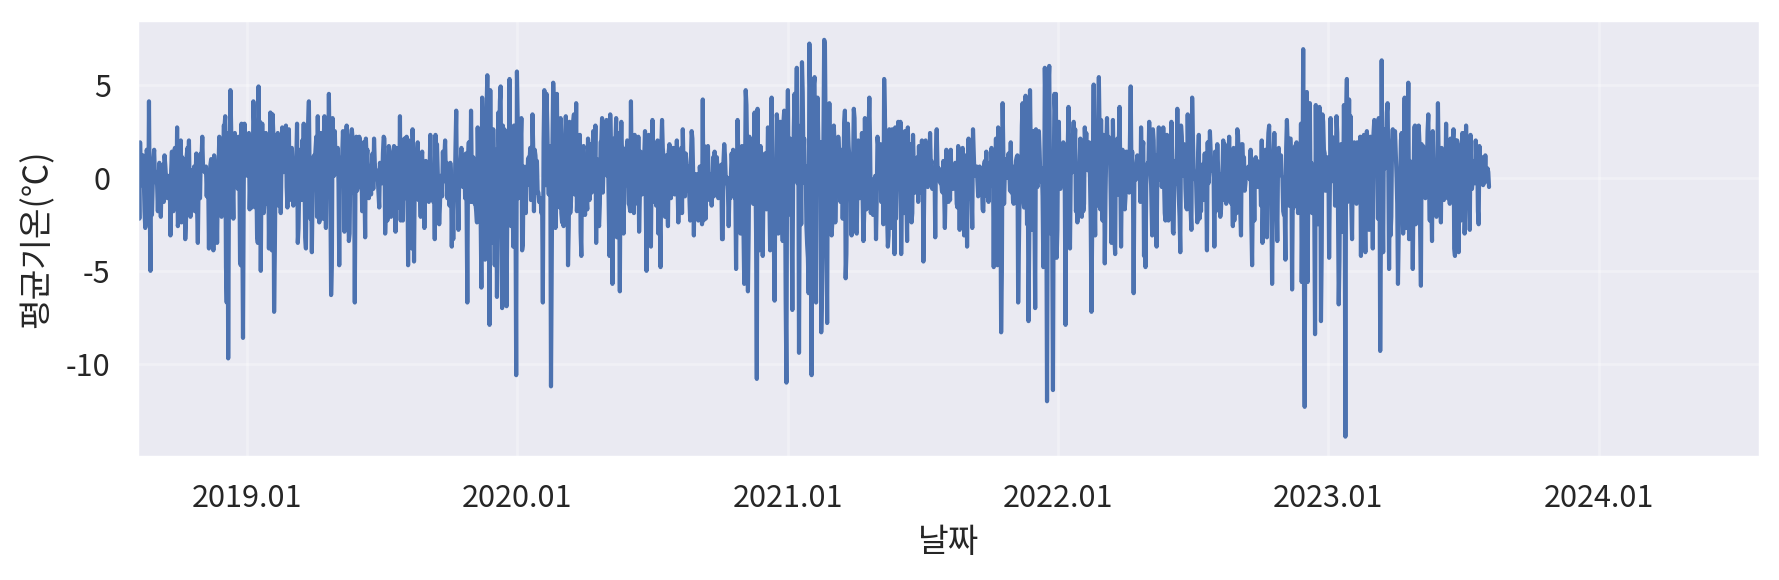

In [134]:
#데이터 범위를 먼저 설정하고 그만큼만 카피 5년 ㄱㄱ
diff_df = df.loc['2018-08-06':'2023-08-06'].copy()
yname = '평균기온(℃)'
diff_count = 0  #몇 번까지 차분을 수행했는지 count
result = []     #결과를 저장할 빈 리스트

while True:
    ar = adfuller(diff_df[yname])
    ar_dict={
        '차수': diff_count,
        'ADF Statistic': ar[0],
        'p-value': ar[1],
        'result' : True if ar[1] <= 0.05 else False
    }

    # 리스트에 정상성 검사 결과를 저장
    result.append(ar_dict)

    # 정상성 충족이라면 반복 중단
    if ar_dict['result']:
        break

    # 정상성이 충족되지 않았다면 차분 수행
    diff_count += 1
    diff_df= diff_df.diff().dropna()

# 차분 결과표
display(DataFrame(result))

# 차분의 결과로 생성된 데이터프레임
display(diff_df.head())

# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1800             #그래프 가로 크기
height_px = 600             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
# sb.boxplot(data=df1, orient='h')
sb.lineplot(data=diff_df, x=diff_df.index, y=yname)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True, alpha=0.3)          
monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)
#시각화 기간은 2023년 8월 6일 기준으로 전 후 1년
target_date = pd.Timestamp('2023-08-06')
start_date = target_date - pd.DateOffset(years=5)
end_date = target_date + pd.DateOffset(years=1)
ax.set_xlim(start_date, end_date)



# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

    

ACF값

In [135]:
# 1. 차분된 시계열의 자기상관계수(ACF) 계산 (lag - 0부터 시작)
acf_vals = acf(diff_df['평균기온(℃)'])

# 2. ACF 유의성 판단 기준(근사적 95% 신뢰구간)
threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

# 3. 임계값을 초과하는 (유의한) lag 인덱스 추출
significant_lags = np.where(np.abs(acf_vals) > threshold)[0]

# 4. 결과 확인
acf_vals , threshold, significant_lags

(array([ 1.        ,  0.09721694, -0.28067613, -0.16220121, -0.07325298,
        -0.02257618,  0.02125227, -0.00177596,  0.00518465,  0.00217037,
        -0.02953592, -0.00785276, -0.00210821,  0.02441698,  0.01782201,
        -0.02686037, -0.05221324,  0.06302637,  0.04337092,  0.03510865,
        -0.0244253 , -0.02124113,  0.00846272,  0.01908095, -0.00515226,
         0.01627834,  0.02607032, -0.00301147, -0.02135998, -0.01885623,
         0.01300234,  0.00514494,  0.01312023]),
 np.float64(0.0468036377200909),
 array([ 0,  1,  2,  3,  4, 16, 17]))

In [103]:
acf_vals = acf(diff_df['평균기온(℃)'])

# 2. ACF 유의성 판단 기준(근사적 95% 신뢰구간)
threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

df_acf = DataFrame({
    'lag': np.arange(len(acf_vals)),
    'acf': acf_vals
})

# 3) 유의성 판단
df_acf['abs_acf'] = df_acf['acf'].abs()
df_acf['significant'] = df_acf['abs_acf'] > threshold

# 4) 보기 좋게 정리
df_acf['acf']= df_acf['acf'].round(3)
df_acf['abs_acf']= df_acf['abs_acf'].round(3)
df_acf['threshold'] = round(threshold, 3)

# 5) lag=0 제외(판정용)
df_acf_result = df_acf.query('lag>0').reset_index(drop=True)

# 6) 연속 유의 구간 계산
df_acf_result['prev_sigificant'] = df_acf_result['significant'].shift(1)

df_acf_result['cut_candidate'] = (
    (df_acf_result['prev_sigificant'] == True) &
    (df_acf_result['significant'] == False)
)

df_acf_result[['lag','acf','significant']]
df_acf_result

,lag,acf,abs_acf,significant,threshold,prev_sigificant,cut_candidate
0,1,0.975,0.975,True,0.015,NaN,False
1,2,0.945,0.945,True,0.015,True,False
2,3,0.929,0.929,True,0.015,True,False
3,4,0.919,0.919,True,0.015,True,False
4,5,0.914,0.914,True,0.015,True,False
5,6,0.910,0.910,True,0.015,True,False
6,7,0.907,0.907,True,0.015,True,False
7,8,0.904,0.904,True,0.015,True,False
8,9,0.902,0.902,True,0.015,True,False
9,10,0.898,0.898,True,0.015,True,False


모든게 False면 어떡하나요,,???

In [136]:
q_candidate = (
    df_acf_result.loc[df_acf_result['cut_candidate'], 'lag'].min()-1
)

q_candidate

nan

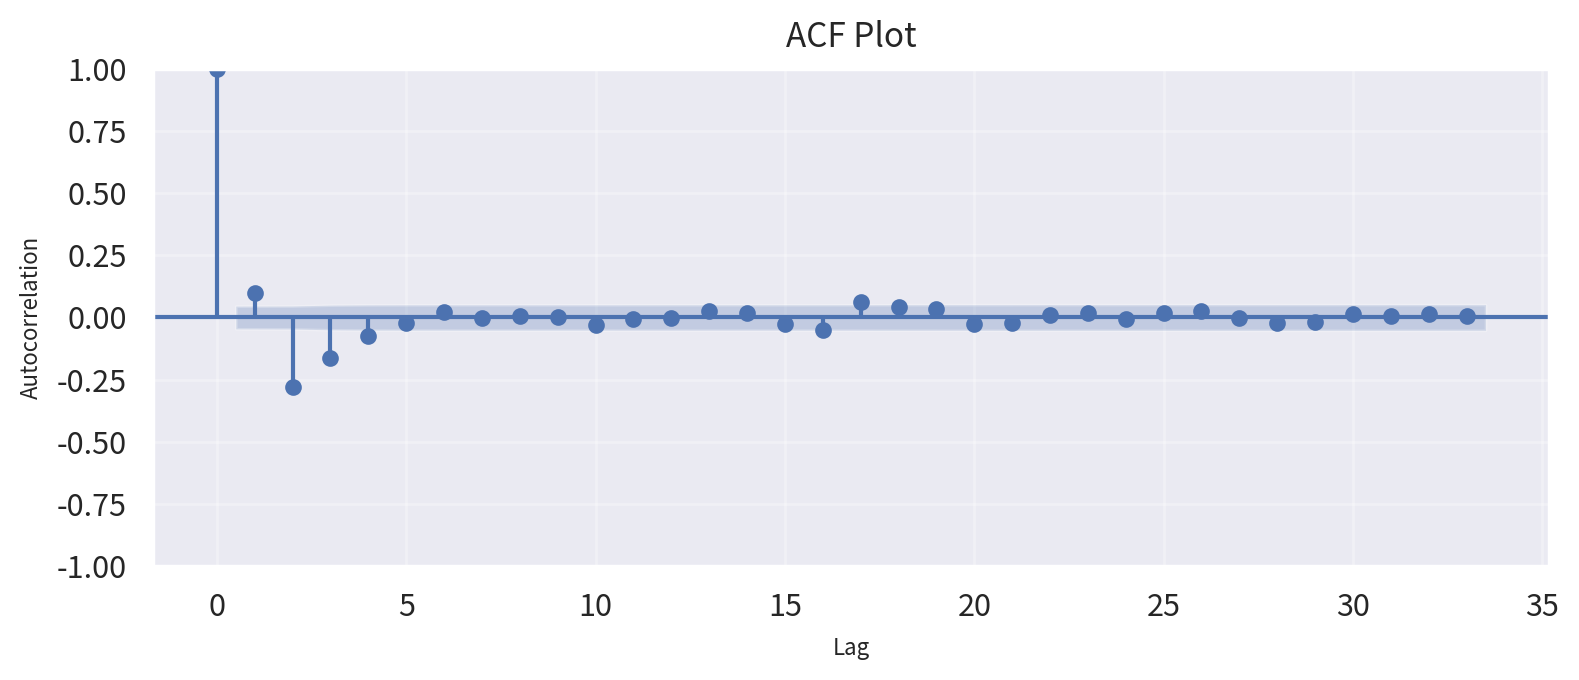

In [137]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1600             #그래프 가로 크기
height_px = 700             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

plot_acf(diff_df['평균기온(℃)'], ax=ax)

ax.axvline(
    x=q_candidate,
    linestyle='--',
    alpha=0.8,
    linewidth=1.5,
    color='red'
)
ax.text(
    q_candidate+0.1,
    ax.get_ylim()[1]*0.9,
    f'MA(q) candidate: {q_candidate}',
    fontsize=9,
    verticalalignment='top'
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.set_title("ACF Plot", fontsize=12, pad=8)
ax.set_xlabel("Lag", fontsize=8, labelpad=5)
ax.set_ylabel("Autocorrelation", fontsize=8, labelpad=5)
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

PACF 값

In [138]:
pacf_vals = pacf(diff_df['평균기온(℃)'])
threshold = 2/np.sqrt(len(diff_df['평균기온(℃)']))

df_pacf = DataFrame({
    'lag': np.arange(len(pacf_vals)),
    'pacf': pacf_vals
})

df_pacf['abs_pacf'] = df_pacf['pacf'].abs()
df_pacf['significant'] = df_pacf['abs_pacf'] > threshold

df_pacf['pacf']= df_pacf['pacf'].round(3)
df_pacf['abs_pacf']= df_pacf['abs_pacf'].round(3)
df_pacf['threshold'] = round(threshold, 3)

df_pacf_result = df_pacf.query('lag>0').reset_index(drop=True)

df_pacf_result['prev_significant'] = df_pacf_result['significant'].shift(1)

df_pacf_result['cut_candidate'] = (
    (df_pacf_result['prev_significant'] == True) &
    (df_pacf_result['significant'] == False)
)

df_pacf_result[['lag','pacf','significant','cut_candidate']]
df_pacf_result

,lag,pacf,abs_pacf,significant,threshold,prev_significant,cut_candidate
0,1,0.097,0.097,True,0.047,NaN,False
1,2,-0.293,0.293,True,0.047,True,False
2,3,-0.109,0.109,True,0.047,True,False
3,4,-0.141,0.141,True,0.047,True,False
4,5,-0.093,0.093,True,0.047,True,False
5,6,-0.058,0.058,True,0.047,True,False
6,7,-0.075,0.075,True,0.047,True,False
7,8,-0.034,0.034,False,0.047,True,True
8,9,-0.042,0.042,False,0.047,False,False
9,10,-0.060,0.060,True,0.047,False,False


In [139]:
p_candidate = (
    df_pacf_result.loc[df_pacf_result['cut_candidate'], 'lag'].min()-1
)
p_candidate

np.int64(7)

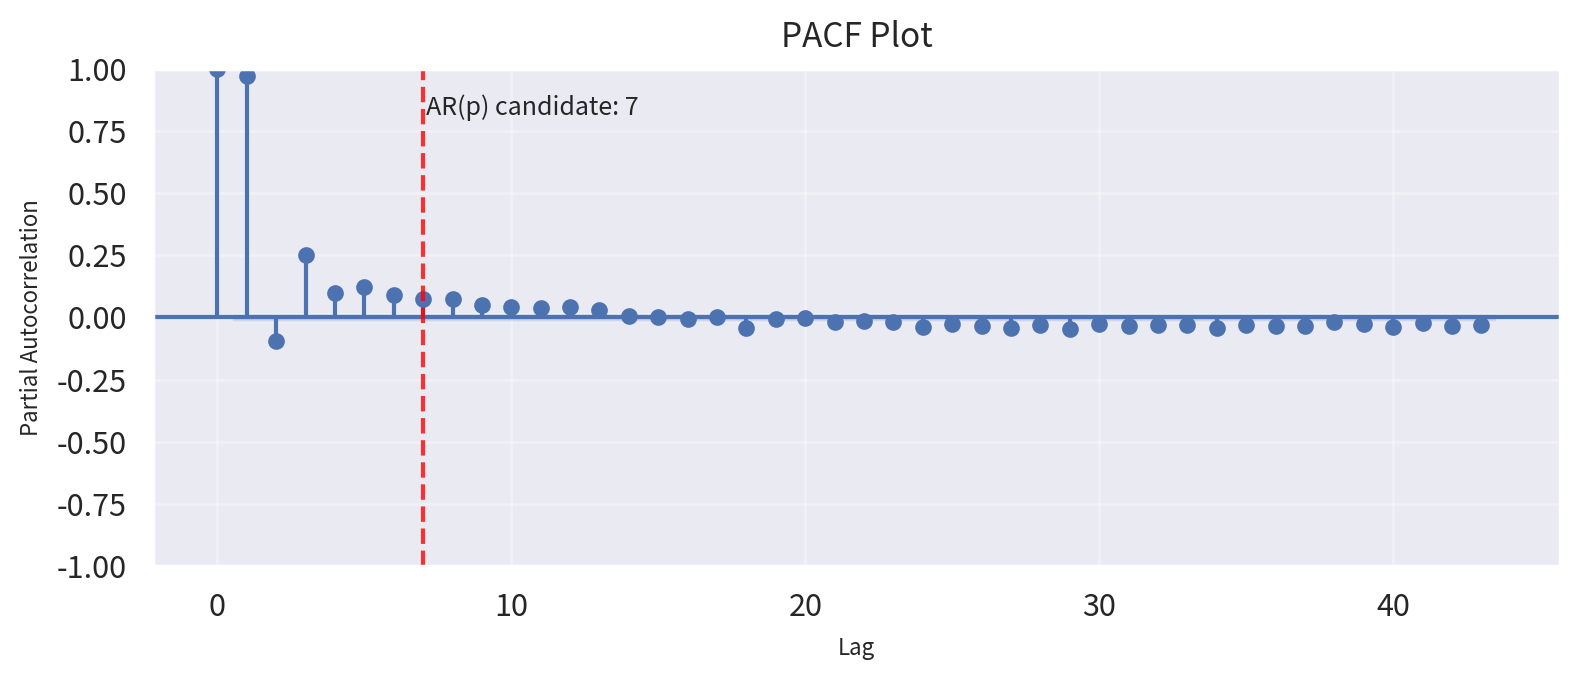

In [140]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1600             #그래프 가로 크기
height_px = 700             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

plot_pacf(origin['평균기온(℃)'], ax=ax)

ax.axvline(
    x=p_candidate,
    linestyle='--',
    alpha=0.8,
    linewidth=1.5,
    color='red'
)
ax.text(
    p_candidate+0.1,
    ax.get_ylim()[1]*0.9,
    f'AR(p) candidate: {p_candidate}',
    fontsize=9,
    verticalalignment='top'
)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.set_title("PACF Plot", fontsize=12, pad=8)
ax.set_xlabel("Lag", fontsize=8, labelpad=5)
ax.set_ylabel("Partial Autocorrelation", fontsize=8, labelpad=5)
ax.grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [142]:
p = 7
d = 1
q = 0

results = []

for x in range(0, p+1):
    for y in range(0, d+1):
        for z in range(0, q+1):
            try:
                #model = ARIMA(df['Passengers'], order=(x, y, z))
                #12개월 단위 계절성 추가
                model = ARIMA(df['평균기온(℃)'], order=(x,y,z), seasonal_order=(x,y,z,12))
                fit = model.fit()

                results.append({
                    'p': x,
                    'd': y,
                    'q': z,
                    'AIC' : fit.aic,
                    'BIC' : fit.bic
                })
            except Exception as e:
                # 수렴 실패, 모형 오류는 건너뜀
                continue
df_results = DataFrame(results)

# 방법1 - 합산 점수 고려
# df_results['AIC_rank'] = df_results['AIC'].rank()
# df_results['BIC_rank'] = df_results['BIC'].rank()

# # 점수가 낮을 수록 좋음
#df_results['rank_sum'] = df_results['AIC_rank'] + df_results['BIC_rank']

#best_model = df_results.sort_values('rank_sum').iloc[0]
#best_model

best_model = df_results.sort_values(['BIC','AIC']).iloc[0]
best_model

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\

KeyboardInterrupt: 

도출된 값으로 최종 모형 만들기 p=3, d=0, q=0

In [110]:
best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q'])
)

s_best_order = (
    int(best_model['p']),
    int(best_model['d']),
    int(best_model['q']),
    12
)

final_model = ARIMA(df['평균기온(℃)'], order=best_order, seasonal_order=s_best_order)
final_fit = final_model.fit()
print(final_fit.summary())

c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:                          평균기온(℃)   No. Observations:                18299
Model:             ARIMA(3, 0, 0)x(3, 0, 0, 12)   Log Likelihood              -40775.873
Date:                             목, 18 12 2025   AIC                          81567.747
Time:                                  18:13:36   BIC                          81630.264
Sample:                              07-01-1973   HQIC                         81588.289
                                   - 08-06-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6513      0.912     13.876      0.000      10.864      14.438
ar.L1          1.0898      0.006    173.529      0.

분석 결과 활용

In [113]:
df2 = df.copy()
df2['pred'] = final_fit.fittedvalues
df2.head()

,평균기온(℃),pred
날짜,,
1973-07-01,22.7,12.651308
1973-07-02,23.8,22.442022
1973-07-03,27.2,23.590437
1973-07-04,25.2,26.993139
1973-07-05,26.9,23.851947


In [115]:
fc = final_fit.forecast(365)
fc

2023-08-07    29.290344
2023-08-08    29.048742
2023-08-09    28.760646
2023-08-10    28.452761
2023-08-11    28.174852
                ...    
2024-08-01    12.666996
2024-08-02    12.666694
2024-08-03    12.666397
2024-08-04    12.666106
2024-08-05    12.665821
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

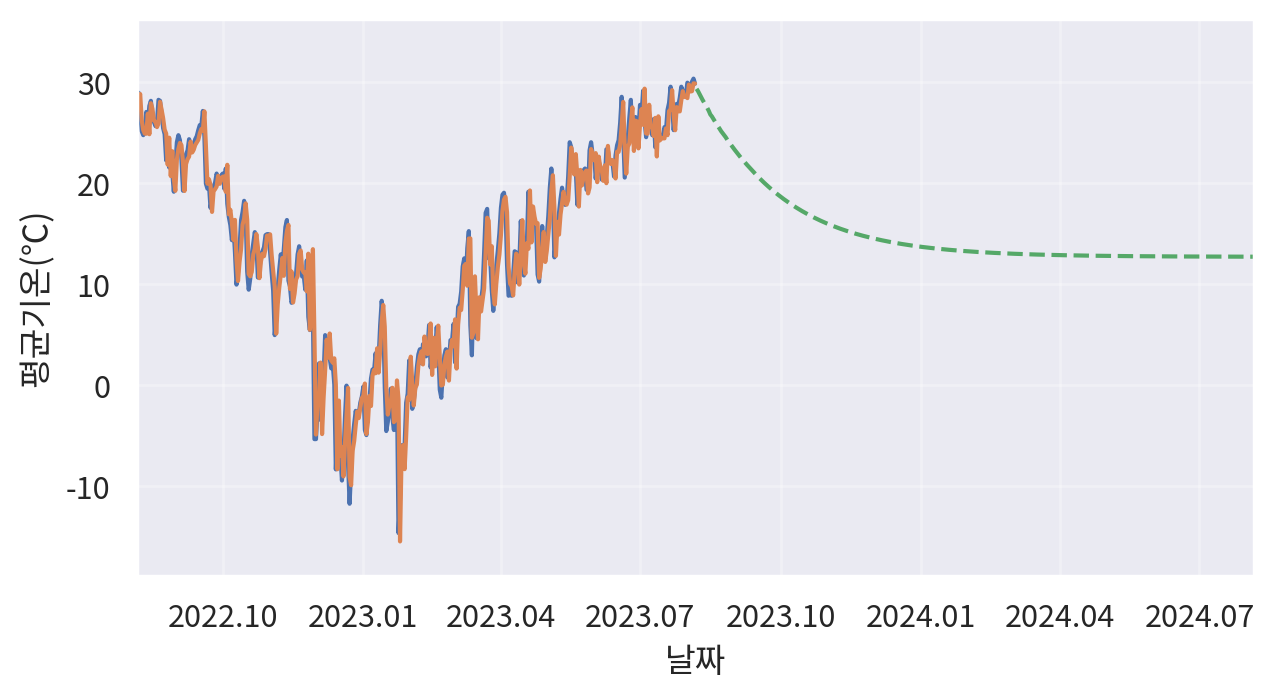

In [116]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1300             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

#관측치
sb.lineplot(data=df2, x=df2.index, y='평균기온(℃)')
#예측치
sb.lineplot(data=df2, x=df2.index, y='pred')
#이후 예상
sb.lineplot(x=fc.index, y=fc.values, linestyle='--')

ax.grid(True, alpha=0.3)

monthyearFmt = dates.DateFormatter("%Y.%m")
ax.xaxis.set_major_formatter(monthyearFmt)
#시각화 기간은 2023년 8월 6일 기준으로 전 후 1년
target_date = pd.Timestamp('2023-08-06')
start_date = target_date - pd.DateOffset(years=1)
end_date = target_date + pd.DateOffset(years=1)

ax.set_xlim(start_date, end_date)
# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [87]:
def arima_report(fit, data, threshold = 0.05):
    """
    SARIMAXResults 객체(fit)와 원본 데이터(data)를 받아
    모형 적합도 표(cdf),
    계수 요약 표(rdf),
    모형 요약 문장(result_report),
    모형 판정 문장(model_report),
    계수별 해석 문장(variable_reports)를 반환한다.
    """

    #--------------------
    # 1. 모형 적합도 요약
    #--------------------
    cdf = DataFrame({
        'Log Likelihood' : [fit.llf],
        'AIC' : [fit.aic],
        'BIC' : [fit.bic],
        'HQIC' : [fit.hqic],
        '관측치 수':[fit.nobs]
    })

    #--------------------
    # 2. 계수 테이블 구성
    #--------------------
    params = fit.params
    bse = fit.bse
    zvals = params/bse
    pvals = fit.pvalues
    conf = fit.conf_int()

    rows = []
    for name in params.index:
        p = pvals[name]
        stars = (
            "***" if p < 0.001 else
            "**" if p < 0.01 else
            "*" if p < 0.05 else
            ""
        )

        rows.append({
            "변수" : name,
            "계수" : params[name],
            "표준오차" : bse[name],
            "z" : f"{zvals[name]:.3f}{stars}",
            "p-value": p,
            "CI_lower": conf.loc[name,0],
            "CI_upper": conf.loc[name,1]
        })
    rdf = DataFrame(rows)

    #--------------------
    # 3. 모형 요약 문장
    #--------------------

    result_report = (
        f"Log Likelihood = {fit.llf:.3f}, "
        f"AIC = {fit.aic:.3f}, "
        f"BIC = {fit.bic:.3f}."
    )

    #--------------------
    # 4. 모형 판정 문장
    #--------------------
    lb = fit.test_serial_correlation(method='ljungbox')
    lb_pvalue = lb[0][1][-1]

    model_report = (
        f"ARIMA{fit.model.order}x{fit.model.seasonal_order}모형을 적합한 결과, "
        f"AIC {fit.aic:.3f}, BIC {fit.bic:.3f}로 나타났으며 "
    )

    if lb_pvalue >= threshold:
        model_report +=(
            "잔차들 사이에 특별한 시간적 패턴은 관찰되지 않음을 통계적으로 확인하였다."
            "(잔차의 자기 상관은 Ljung-Box 검정에서 유의하지 않았다.)"
        )
    else:
        model_report += (
            "잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, "
            "모형이 충분히 설명하지 못했을 가능성이 있다."
            "(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)"
        )

    #--------------------
    # 5. 계수별 해석 문장
    #-------------------
    variable_reports = []

    for _, row in rdf.iterrows():
        variable_reports.append(
            f"{row['변수']} 계수는 {row['계수']:.3f}로 "
            f"통계적으로{'유의하다' if row['p-value'] < threshold else '유의하지 않다'} "
            f"(p {'<' if row['p-value'] < threshold else '>'} {threshold})."
        )

    return cdf, rdf, result_report, model_report, variable_reports

cdf, rdf, r, m, v = arima_report(final_fit, df2)
display(cdf)
display(rdf)
display(r)
display(m)
display(v)


,Log Likelihood,AIC,BIC,HQIC,관측치 수
0,-40779.508504,81575.017009,81637.533822,81595.558949,18299


,변수,계수,표준오차,z,p-value,CI_lower,CI_upper
0,const,12.650385,0.938514,13.479***,2.074283e-41,10.810932,14.489838
1,ar.L1,1.090425,0.006279,173.667***,0.000000e+00,1.078118,1.102731
2,ar.L2,-0.365028,0.009538,-38.271***,0.000000e+00,-0.383722,-0.346333
3,ar.L3,0.253966,0.006806,37.314***,9.600686e-305,0.240626,0.267306
4,ar.S.L6,-0.012869,0.006938,-1.855,6.362328e-02,-0.026468,0.000730
5,ar.S.L12,0.006921,0.006963,0.994,3.202308e-01,-0.006726,0.020568
6,ar.S.L18,0.007599,0.006780,1.121,2.623895e-01,-0.005690,0.020888
7,sigma2,5.047797,0.039919,126.450***,0.000000e+00,4.969556,5.126037


'Log Likelihood = -40779.509, AIC = 81575.017, BIC = 81637.534.'

'ARIMA(3, 0, 0)x(3, 0, 0, 6)모형을 적합한 결과, AIC 81575.017, BIC 81637.534로 나타났으며 잔차들 사이에 시간적 패턴이 남아있는 것으로 나타났으며, 모형이 충분히 설명하지 못했을 가능성이 있다.(잔차의 자기 상관이 Ljung-Box 검정에서 통계적으로 유의하다.)'

['const 계수는 12.650로 통계적으로유의하다 (p < 0.05).',
 'ar.L1 계수는 1.090로 통계적으로유의하다 (p < 0.05).',
 'ar.L2 계수는 -0.365로 통계적으로유의하다 (p < 0.05).',
 'ar.L3 계수는 0.254로 통계적으로유의하다 (p < 0.05).',
 'ar.S.L6 계수는 -0.013로 통계적으로유의하지 않다 (p > 0.05).',
 'ar.S.L12 계수는 0.007로 통계적으로유의하지 않다 (p > 0.05).',
 'ar.S.L18 계수는 0.008로 통계적으로유의하지 않다 (p > 0.05).',
 'sigma2 계수는 5.048로 통계적으로유의하다 (p < 0.05).']